# Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

# Reading data from file

In [2]:
df = pd.read_csv('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/Final_Data/Self_harm_modeling.csv', index_col=0)
df.head()

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population,Female,Male,Black,Hispanic,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
6,Male,White Non-Hispanice,00-04,2001,0,5862483,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Male,Black,00-04,2001,0,1585658,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,Male,Hispanic,00-04,2001,0,1900490,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Male,Other Non-Hispanic,00-04,2001,0,518145,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Female,White Non-Hispanice,00-04,2001,0,5572690,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Dropping unwanted columns

In [3]:
y = df['Injuries']
df1 = df.drop(['Sex', 'Race/Ethnicity', 'Age Group', 'Injuries'], axis=1)

In [4]:
df1.head()

,Year,Population,Female,Male,Black,Hispanic,Other Non-Hispanic,White Non-Hispanice,00-04,05-09,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
6,2001,5862483,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,2001,1585658,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,2001,1900490,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,2001,518145,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,2001,5572690,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting dataset into train and split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = 0.75)

# Importing random forest classifier and training model

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators = 100)  
  
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

# Exporting tree as dot file

In [7]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(rfc_model.estimators_[0], 
                out_file='tree.dot', 
                feature_names = df1.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Visualizing tree

In [8]:
#from IPython.display import Image
#Image(filename = 'tree.png')

# Calculating model accuracy

In [9]:
from sklearn import metrics  

y_pred = rfc_model.predict(X_test)    
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7527862208713273


# Importing linear regression and training model

In [10]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

# Predicting on test dataset

In [11]:
y_pred = lr_model.predict(X_test)

In [12]:
y_test = list(map(float, y_test))

In [13]:
print(len(X_train))

657


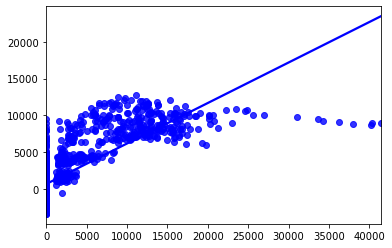

In [14]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

# Calculating rmse

In [15]:
import math
print("Root mean squared error: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root mean squared error:  3222.2900740538994


Here we can see that rmse for linear regression model is very high. This is because many values are zero and there is very less linear correlation. Thus we use random forest classifier

In [16]:
importance = rfc_model.feature_importances_
labels = df1.columns

In [17]:
feature_imp = pd.Series(importance, index = labels).sort_values(ascending = False)
feature_imp

Population             0.382027
Year                   0.189139
White Non-Hispanice    0.050073
15-19                  0.034787
Male                   0.030747
Female                 0.030150
10-14                  0.028184
Black                  0.024843
20-24                  0.024444
Hispanic               0.021198
35-39                  0.020804
Other Non-Hispanic     0.019703
40-44                  0.019487
30-34                  0.018394
45-49                  0.018250
25-29                  0.017485
60-64                  0.014825
50-54                  0.014102
05-09                  0.011798
55-59                  0.011689
65-69                  0.005050
00-04                  0.003856
75-79                  0.003067
70-74                  0.003046
85+                    0.001464
80-84                  0.001390
dtype: float64

From the above values and below diagram we can see that population has the most impact on injuries.
White Non-Hispanice people are more likely to commit self harm


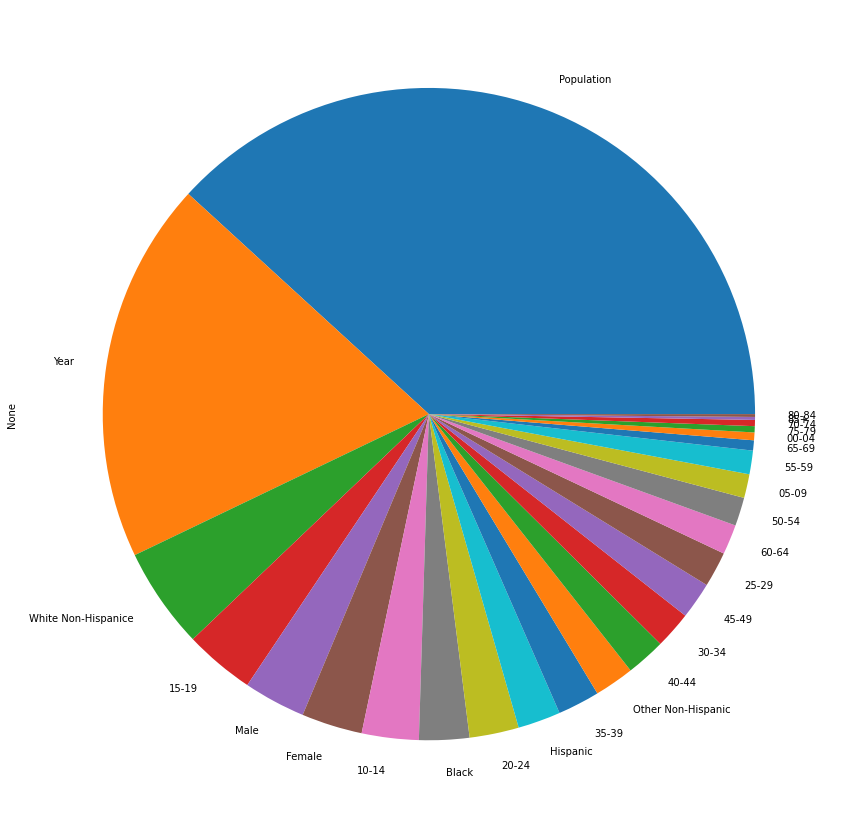

In [18]:
plot = feature_imp.plot.pie(figsize=(15, 15))

In [19]:
df_grouped_pop = df.groupby(['Year', 'Population']).agg({'Injuries': "sum"}).reset_index()
df_grouped_pop

,Year,Population,Injuries
0,2001,0,4352
1,2001,32321,0
2,2001,48486,0
3,2001,49885,0
4,2001,54115,0
...,...,...,...
2603,2018,6817142,9480
2604,2018,7112293,3557
2605,2018,7462883,4741
2606,2018,7550439,4239


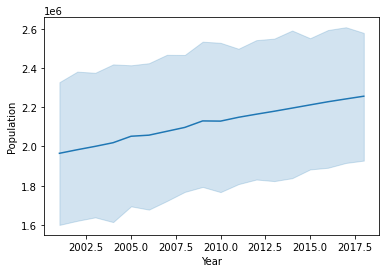

In [20]:
sns.lineplot(data=df_grouped_pop, x='Year', y='Population')
plt.show()

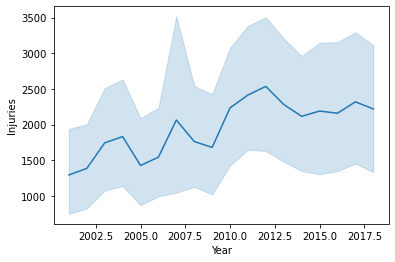

In [21]:
sns.lineplot(data=df_grouped_pop, x='Year', y='Injuries')
plt.show()

In [22]:
df.columns

Index(['Sex', 'Race/Ethnicity', 'Age Group', 'Year', 'Injuries', 'Population',
       'Female', 'Male', 'Black', 'Hispanic', 'Other Non-Hispanic',
       'White Non-Hispanice', '00-04', '05-09', '10-14', '15-19', '20-24',
       '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80-84', '85+'],
      dtype='object')

In [23]:
#df_grouped_age = df.pivot(index="Year", columns="Age Group", values="Injuries")
df_grouped_age = df.reset_index().pivot_table(values='Injuries', index="Year", columns='Age Group', aggfunc='sum')
df_grouped_age

Age Group,00-04,05-09,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
Year,,,,,,,,,,,,,,,,,,
2001,0,0,8399,39275,31170,17983,28221,22661,20038,12147,5618,1851,0,0,0,0,0,0
2002,0,0,9769,39575,26867,30193,21460,22123,20770,15760,8567,5788,0,0,0,0,0,0
2003,0,0,12230,43997,33744,26985,33897,28448,29623,23347,12640,6022,1793,0,0,0,0,0
2004,0,0,13522,64045,37960,28400,27021,23992,27601,22311,12350,6762,1519,0,0,0,0,0
2005,0,0,7524,42843,34596,25830,23442,18315,21158,16177,12163,3227,0,0,0,0,0,0
2006,0,0,10966,38448,34305,26103,24426,20278,28610,18635,11962,6284,3672,0,0,0,0,0
2007,0,0,9653,66190,56461,35065,25167,30361,31483,23988,17020,3822,0,0,0,0,0,0
2008,0,0,8912,41901,41038,35202,25126,25752,27454,22148,14299,7766,3822,2012,0,0,0,0
2009,0,0,8363,42006,35699,33174,25852,24276,22653,23018,16647,7716,2368,0,0,0,0,0
